Integrantes do Grupo

Turma:2ESPF

* Gabriel Henrique Padula – RA: 554907

* Gustavo Pierri – RA: 558928

* Rodrigo Nakata – RA: 556417

* Gabriel Ferreira – RA: 551669

* Arthur Abonizio – RA: 555506


## Contexto

A Dasa é a maior rede de saúde integrada do Brasil, reunindo mais de 900 unidades e 15 hospitais de alta complexidade distribuídos pelo país. Com um propósito voltado à transformação da lógica da saúde, a organização adota um modelo de cuidado integral baseado em valor. Isso significa entregar soluções que priorizam o bem-estar do paciente, eficiência dos recursos e qualidade assistencial, por meio de tecnologia, dados e inovação na gestão da saúde.

## Objetivo

O principal objetivo da análise é identificar padrões de consumo de materiais hospitalares, detectar anomalias de estoque, compreender flutuações nos custos unitários e localizar possíveis falhas de registro ao longo do tempo. A partir desses achados, será proposta uma estratégia orientada por dados que contribua para o aumento da acurácia das informações e para um melhor planejamento logístico nas unidades da Dasa. Essa iniciativa visa apoiar a tomada de decisão e otimizar o uso dos recursos hospitalares, alinhada à visão de cuidado integral da empresa.

Base de Dados
A base de dados utilizada está contida no arquivo ‘DasaMatHosp.xlsx’, com aproximadamente 30 mil registros distribuídos ao longo do ano de 2024. Esses registros trazem informações detalhadas sobre o estoque e o custo unitário de 10 tipos de materiais hospitalares, usados em diferentes turnos. A análise da base permite observar fenômenos como picos de estocagem, faltas temporárias e variações de preços associadas às categorias dos materiais.





## Variáveis da Base:

* Material: É uma variável do tipo qualitativa nominal, pois ela somente nomeial os materiais hospitalares e não as ordenam.

* DataHora: É uma variável do tipo quantitativa. É  o momento exato do registro do estoque.

* Estoque:  É uma variável do tipo quantitativa discreta, pois são valores inteiros, quantidade do material disponível no horário registrado.

* Custo_Unitario: É uma variável do tipo quantitativa contínua, pois são valores quebrados, preço por unidade do material naquele momento.

* Custo_Total: É uma variável do tipo quantitativa contínua, pois são valores quebrados, valor total do estoque no registro (Estoque × Custo_Unitario).


## Temas
1. Verificar os 5 produtos mais usados e a variação do estoque. 
2. Verificar os 5 produtos menos usados e a variação no estoque.
3. Verificar os 3 produtos com maior custo unitario no decorrer do ano.
4. Verificar os 3 produtos com menor custo unitário no decorrer do ano.
5. Verificar quais os 5 produtos mais usados em cada época do ano.
6. Verificar quais os 5 produtos mais usados a cada 3 horas.


## Análise, limpeza e formatação dos dados

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dados= pd.read_excel('DasaMatHosp.xlsx')

In [3]:
dados.head()

,Material,DataHora,Estoque,Custo_Unitario,Custo_Total
0,Seringas,2024-05-17 15:00:00,66.0,0.45,29.70
1,Máscaras N95,2024-05-27 09:00:00,320.0,5.15,1648.00
2,Algodão,2024-03-24 09:00:00,366.0,0.25,91.50
3,Seringas,2024-04-16 06:00:00,565.0,0.44,248.60
4,Luvas Cirúrgicas,2024-08-22 18:00:00,171.0,0.89,152.19


In [4]:
#Ordenando a tabela pelas datas
dados = dados.sort_values(by='DataHora')
print(dados)

               Material            DataHora  Estoque  Custo_Unitario  \
29353      Máscaras N95 2024-01-01 00:00:00    300.0            3.96   
18706      Gaze Estéril 2024-01-01 00:00:00    278.0            0.40   
11054           Algodão 2024-01-01 00:00:00    351.0            0.25   
13882        Adrenalina 2024-01-01 00:00:00    403.0            4.92   
4027           Seringas 2024-01-01 00:00:00   1084.0            0.52   
...                 ...                 ...      ...             ...   
8554        Paracetamol 2024-12-31 21:00:00    490.0            1.50   
12762           Algodão 2024-12-31 21:00:00    381.0            0.25   
16390  Luvas Cirúrgicas 2024-12-31 21:00:00    288.0            0.70   
9904   Soro Fisiológico 2024-12-31 21:00:00    288.0            2.97   
6556         Álcool 70% 2024-12-31 21:00:00    191.0            2.00   

       Custo_Total  
29353      1188.00  
18706       111.20  
11054        87.75  
13882      1982.76  
4027        563.68  
...      

In [5]:
#Excluindo a coluna de indices e gerando uma nova
dados= dados.reset_index(drop= True)
print(dados)

               Material            DataHora  Estoque  Custo_Unitario  \
0          Máscaras N95 2024-01-01 00:00:00    300.0            3.96   
1          Gaze Estéril 2024-01-01 00:00:00    278.0            0.40   
2               Algodão 2024-01-01 00:00:00    351.0            0.25   
3            Adrenalina 2024-01-01 00:00:00    403.0            4.92   
4              Seringas 2024-01-01 00:00:00   1084.0            0.52   
...                 ...                 ...      ...             ...   
29375       Paracetamol 2024-12-31 21:00:00    490.0            1.50   
29376           Algodão 2024-12-31 21:00:00    381.0            0.25   
29377  Luvas Cirúrgicas 2024-12-31 21:00:00    288.0            0.70   
29378  Soro Fisiológico 2024-12-31 21:00:00    288.0            2.97   
29379        Álcool 70% 2024-12-31 21:00:00    191.0            2.00   

       Custo_Total  
0          1188.00  
1           111.20  
2            87.75  
3          1982.76  
4           563.68  
...      

In [6]:
#Criando as colunas Data e Hora
dados['Data'] = dados['DataHora'].dt.date
dados['Hora'] = dados['DataHora'].dt.time
print(dados)

               Material            DataHora  Estoque  Custo_Unitario  \
0          Máscaras N95 2024-01-01 00:00:00    300.0            3.96   
1          Gaze Estéril 2024-01-01 00:00:00    278.0            0.40   
2               Algodão 2024-01-01 00:00:00    351.0            0.25   
3            Adrenalina 2024-01-01 00:00:00    403.0            4.92   
4              Seringas 2024-01-01 00:00:00   1084.0            0.52   
...                 ...                 ...      ...             ...   
29375       Paracetamol 2024-12-31 21:00:00    490.0            1.50   
29376           Algodão 2024-12-31 21:00:00    381.0            0.25   
29377  Luvas Cirúrgicas 2024-12-31 21:00:00    288.0            0.70   
29378  Soro Fisiológico 2024-12-31 21:00:00    288.0            2.97   
29379        Álcool 70% 2024-12-31 21:00:00    191.0            2.00   

       Custo_Total        Data      Hora  
0          1188.00  2024-01-01  00:00:00  
1           111.20  2024-01-01  00:00:00  
2     

C:\Users\marce\AppData\Local\Temp\ipykernel_27996\2839492345.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dados['Outlier_Estoque'] = dados.groupby('Material', group_keys=False).apply(detectar_outliers, 'Estoque')
C:\Users\marce\AppData\Local\Temp\ipykernel_27996\2839492345.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dados['Outlier_Custo'] = dados.groupby('Material', group_keys=False).apply(

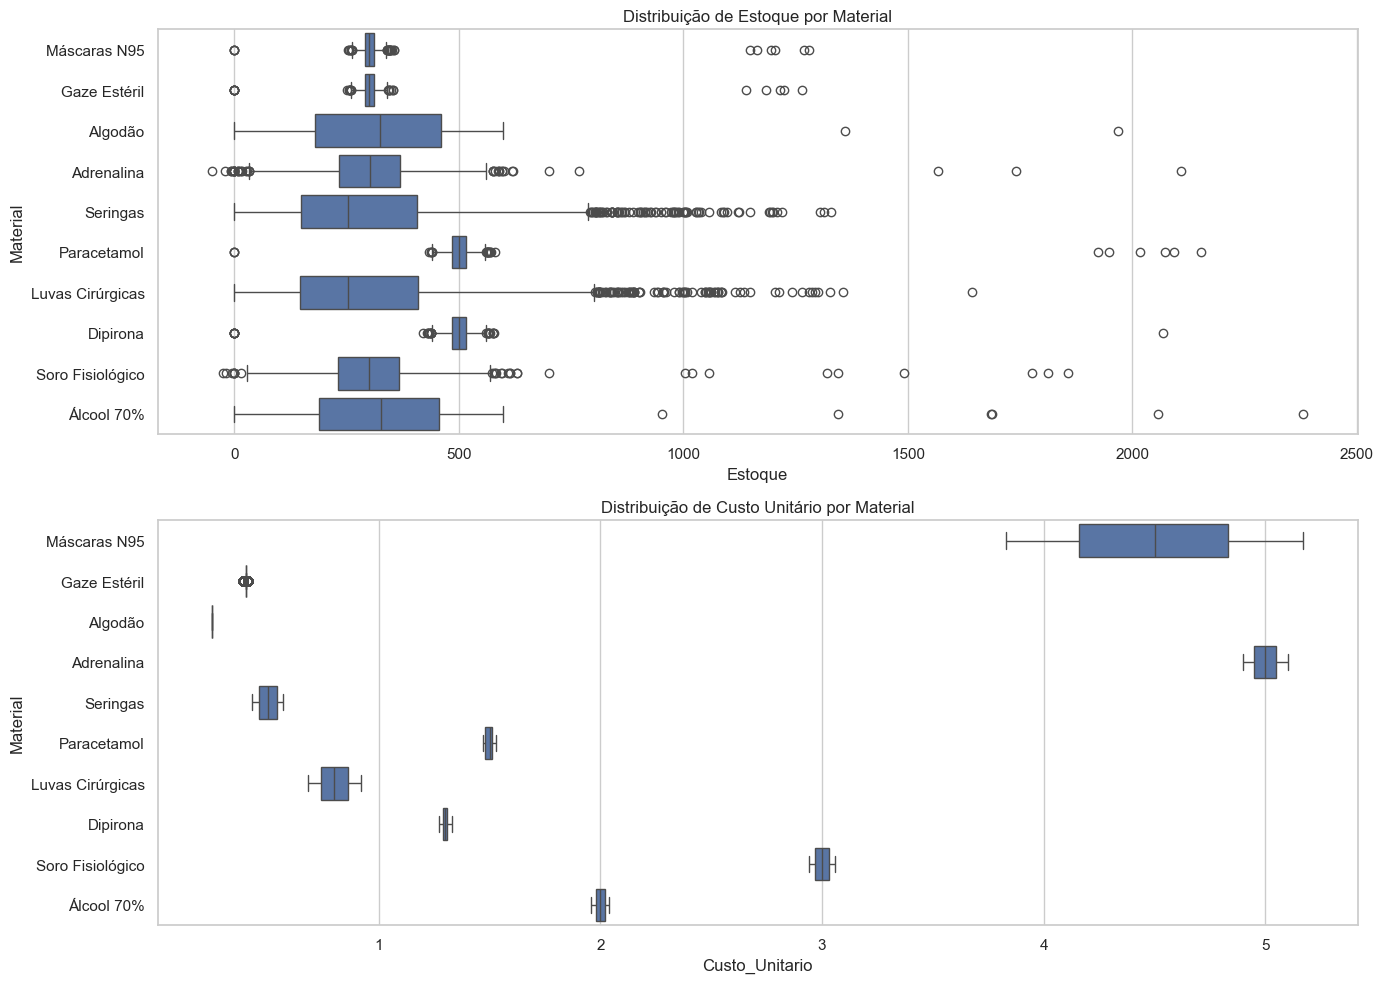

In [7]:

#Função para detectar outliers via IQR
def detectar_outliers(grupo, coluna):
    Q1 = grupo[coluna].quantile(0.25)
    Q3 = grupo[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (grupo[coluna] < limite_inferior) | (grupo[coluna] > limite_superior)

#Criar colunas booleanas para outliers
dados['Outlier_Estoque'] = dados.groupby('Material', group_keys=False).apply(detectar_outliers, 'Estoque')
dados['Outlier_Custo'] = dados.groupby('Material', group_keys=False).apply(detectar_outliers, 'Custo_Unitario')


sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10), tight_layout=True)

# Estoque por Material
sns.boxplot(data=dados, x='Estoque', y='Material', ax=axes[0])
axes[0].set_title('Distribuição de Estoque por Material')

# Custo Unitário por Material
sns.boxplot(data=dados, x='Custo_Unitario', y='Material', ax=axes[1])
axes[1].set_title('Distribuição de Custo Unitário por Material')

plt.show()

In [8]:
# Filtrar registros com estoque negativo
estoque_negativo = dados[dados['Estoque'] < 0]

# Exibir resumo por material
resumo_negativo = (
    estoque_negativo.groupby('Material')
    .agg(Quantidade_Registros=('Estoque', 'count'),
         Estoque_Mínimo=('Estoque', 'min'),
         Estoque_Médio=('Estoque', 'mean'))
    .reset_index()
    .sort_values(by='Quantidade_Registros', ascending=False)
)

# Mostrar a tabela resumo
print(resumo_negativo)

           Material  Quantidade_Registros  Estoque_Mínimo  Estoque_Médio
0        Adrenalina                     5           -49.0          -17.8
1  Soro Fisiológico                     3           -26.0          -17.0


## Análise descritiva e gráficos

### Verificar os 5 produtos mais usados 

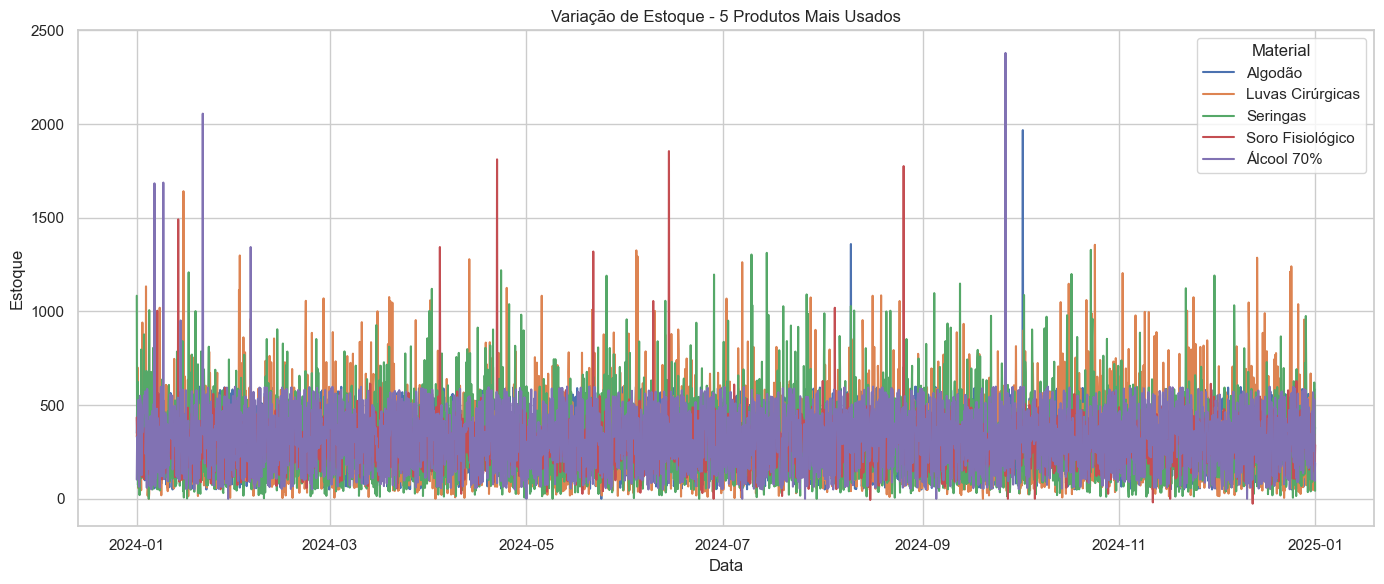

In [11]:
#1. Verificar os 5 produtos mais usados e a variação do estoque. 
# Garantir que a coluna DataHora esteja no formato datetime
dados['DataHora'] = pd.to_datetime(dados['DataHora'])

# Ordenar os dados para calcular variação por material e tempo
dados_ordenado = dados.sort_values(['Material', 'DataHora'])

# Calcular a diferença de estoque entre os registros consecutivos (variação)
dados_ordenado['Delta_Estoque'] = dados_ordenado.groupby('Material')['Estoque'].diff()

# Considerar apenas as reduções de estoque (usos)
usos = dados_ordenado[dados_ordenado['Delta_Estoque'] < 0].copy()
usos['Consumo'] = usos['Delta_Estoque'].abs()  # valor positivo do consumo

# Somar o total de consumo por material
consumo_total = usos.groupby('Material')['Consumo'].sum().sort_values(ascending=False)

# Selecionar os 5 mais usados
top_5_usados = consumo_total.head(5).index.tolist()

# Filtrar dados para esses 5 materiais
dados_top5 = dados_ordenado[dados_ordenado['Material'].isin(top_5_usados)]

# Gráfico: Variação de estoque ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_top5, x='DataHora', y='Estoque', hue='Material')
plt.title('Variação de Estoque - 5 Produtos Mais Usados')
plt.xlabel('Data')
plt.ylabel('Estoque')
plt.legend(title='Material')
plt.tight_layout()
plt.show()


Esse gráfico exibe, ao longo do tempo, a variação no custo unitário dos três produtos mais caros (em média) no ano.

📊 O que observar:

* Picos ou quedas repentinas podem indicar eventos como reabastecimento com fornecedores diferentes ou crises de suprimento.

* Uma linha estável sugere controle de contratos ou preço fixado.

* Se os produtos forem, por exemplo, "Luvas Cirúrgicas", "Máscaras N95" e "Adrenalina", espera-se que haja variação conforme alta demanda (ex: surtos de doenças ou aumento de cirurgias).

📌 Interpretação:
Se os valores mostram alta volatilidade (muitas oscilações), a Dasa pode estar sujeita a falta de padronização de compra ou problemas de cadeia de suprimento.

### 5 produtos menos usados

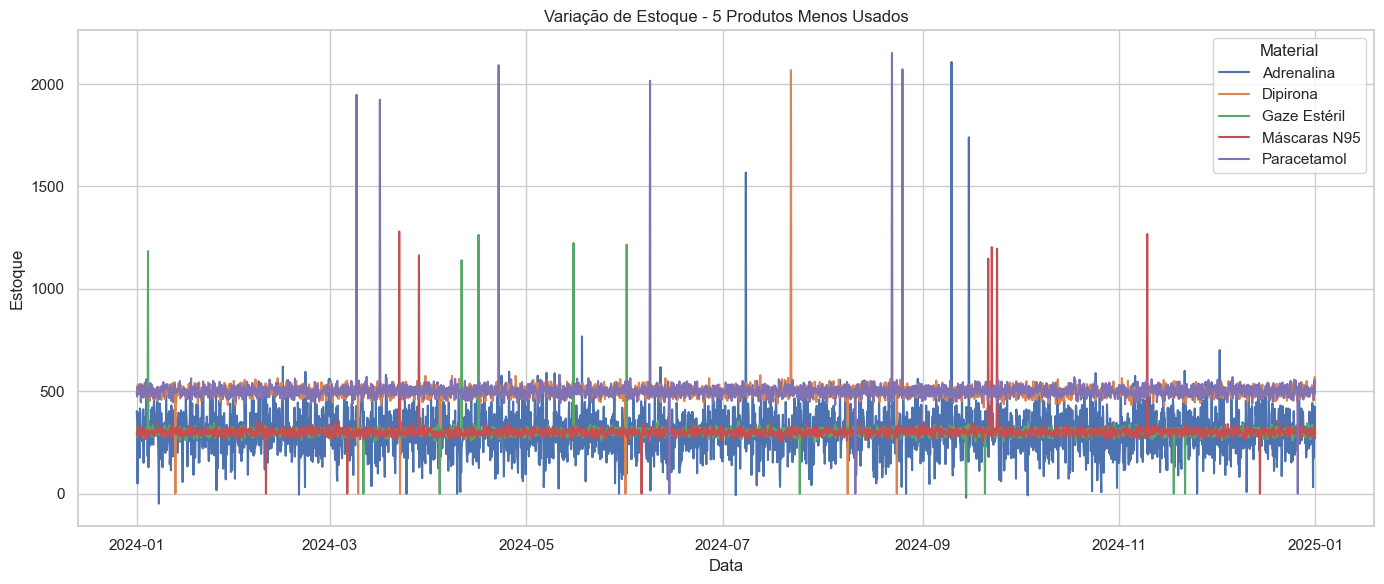

In [12]:
#2. Verificar os 5 produtos menos usados e a variação no estoque.
# Selecionar os 5 menos usados
bottom_5_usados = consumo_total.tail(5).index.tolist()

# Filtrar dados para esses 5 materiais
dados_bottom5 = dados_ordenado[dados_ordenado['Material'].isin(bottom_5_usados)]

# Gráfico: Variação de estoque ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_bottom5, x='DataHora', y='Estoque', hue='Material')
plt.title('Variação de Estoque - 5 Produtos Menos Usados')
plt.xlabel('Data')
plt.ylabel('Estoque')
plt.legend(title='Material')
plt.tight_layout()
plt.show()


Este gráfico exibe a variação diária do estoque (Estoque) ao longo do tempo (Data) para cinco materiais (Adrenalina, Dipirona, Gaze Estéril, Máscaras e Paracetamol)identificados como "Produtos Menos Usados", abrangendo o período de janeiro de 2024 até o início de 2025.

Eixo X (Data): Representa o tempo, cobrindo aproximadamente um ano, do início de 2024 ao início de 2025.
    
Eixo Y (Estoque): Representa o nível ou a quantidade de estoque do material.

Linhas (Material): Cada linha colorida representa um material específico: Adrenalina (azul), Dipirona (laranja), Gaze Estéril (verde), Máscaras N95 (vermelho) e Paracetamol (roxo).


📊 O que observar:

* Geralmente, esses materiais possuem custo mais estável.

* Picos ou quedas podem indicar erros de registro ou promoções/eventos sazonais de compra.

📌 Interpretação:


* Níveis Gerais de Estoque: A maioria dos produtos "menos usados", como Adrenalina, Gaze Estéril e Máscaras N95, apresenta níveis de estoque relativamente estáveis e baixos, geralmente flutuando abaixo de 500 unidades.

* Picos Ocasional: Apesar de serem rotulados como "menos usados", alguns materiais, particularmente Paracetamol (roxo) e Dipirona (laranja), exibem picos significativos e acentuados de estoque em vários pontos ao longo do ano. Esses picos podem atingir níveis de 1500 a mais de 2000 unidades, indicando grandes e infrequentes recebimentos ou ajustes de estoque. Após esses picos, os níveis de estoque caem rapidamente, sugerindo consumo ou transferência. Porém  essas variação inesperada nesses materiais de baixo custo, pode valer uma auditoria nos processos de entrada de dados ou nos contratos com fornecedores.

* Volatilidade: O gráfico destaca a alta volatilidade no estoque desses itens menos usados, impulsionada principalmente por eventos de reabastecimento grandes e infrequentes, em vez de uma taxa de uso consistente e elevada.
    
* Padrão de Uso: As rápidas quedas após os picos sugerem que, mesmo que os produtos sejam "menos usados" diariamente, quando são necessários, podem ser consumidos relativamente rápido, ou grandes quantidades podem ser usadas para fins específicos.

In [13]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inf) & (df[coluna] <= limite_sup)]

# Aplicar aos dados antes de gerar gráficos
dados_sem_outliers = remover_outliers_iqr(dados, 'Custo_Unitario')



In [14]:
# Novo custo médio sem outliers
custo_medio_sem_outliers = dados_sem_outliers.groupby('Material')['Custo_Unitario'].mean().sort_values()

# 3 menores e 3 maiores
bottom3_custo = custo_medio_sem_outliers.head(3).index.tolist()
top3_custo = custo_medio_sem_outliers.tail(3).index.tolist()

# Filtrar os dados
dados_top3 = dados_sem_outliers[dados_sem_outliers['Material'].isin(top3_custo)]
dados_bottom3 = dados_sem_outliers[dados_sem_outliers['Material'].isin(bottom3_custo)]


### 3 produtos com maior custo médio

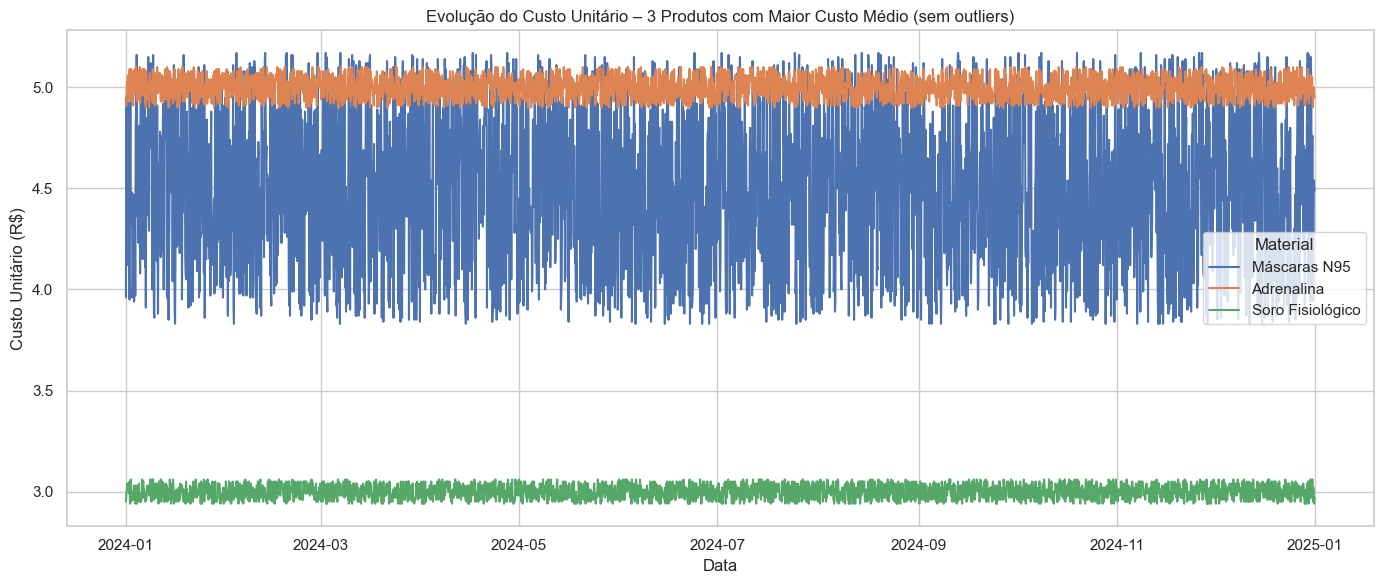

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_top3, x='DataHora', y='Custo_Unitario', hue='Material')
plt.title('Evolução do Custo Unitário – 3 Produtos com Maior Custo Médio (sem outliers)')
plt.xlabel('Data')
plt.ylabel('Custo Unitário (R$)')
plt.tight_layout()
plt.show()


Este gráfico ilustra a evolução diária do custo unitário (Custo Unitário (R$)) para três materiais identificados como tendo o "Maior Custo Médio", com a remoção de outliers (valores atípicos), de janeiro de 2024 até o início de 2025.

Eixo X (Data): Representa o tempo, do início de 2024 ao início de 2025.

Eixo Y (Custo Unitário (R$)): Representa o custo unitário do material em Reais (R$). A escala varia de aproximadamente R$3,0 a R$5,5.

Linhas (Material): Cada linha colorida representa um material específico: Máscaras N95 (azul), Adrenalina (laranja) e Soro Fisiológico (verde).

Comprimento dos “bigodes”: reflete a dispersão de preços.

📌 Interpretação:

Máscaras N95 e Adrenalina: Esses dois materiais mostram custos unitários consistentemente mais altos, flutuando principalmente entre R$4,8 e R$5,2. Suas linhas de custo estão muito próximas e se sobrepõem em grande parte, indicando tendências de preços semelhantes. Há uma pequena flutuação diária, mas, no geral, seus custos unitários permanecem dentro de uma faixa estreita.

Soro Fisiológico: Este material tem um custo unitário significativamente menor e muito mais estável, mantendo-se um pouco acima de R$3,0. A linha é notavelmente plana, sugerindo muito pouca variação em seu preço unitário ao longo de todo o ano.
Estabilidade de Preços: Para esses itens de alto custo, os preços unitários parecem relativamente estáveis durante o período observado, sem grandes aumentos ou diminuições de preço.

Produtos com maior variabilidade podem estar sofrendo de:

* Falta de contratos de preço fixo

* Registros inconsistentes

* Compras emergenciais com custo maior

### 3 produtos com menor custo médio

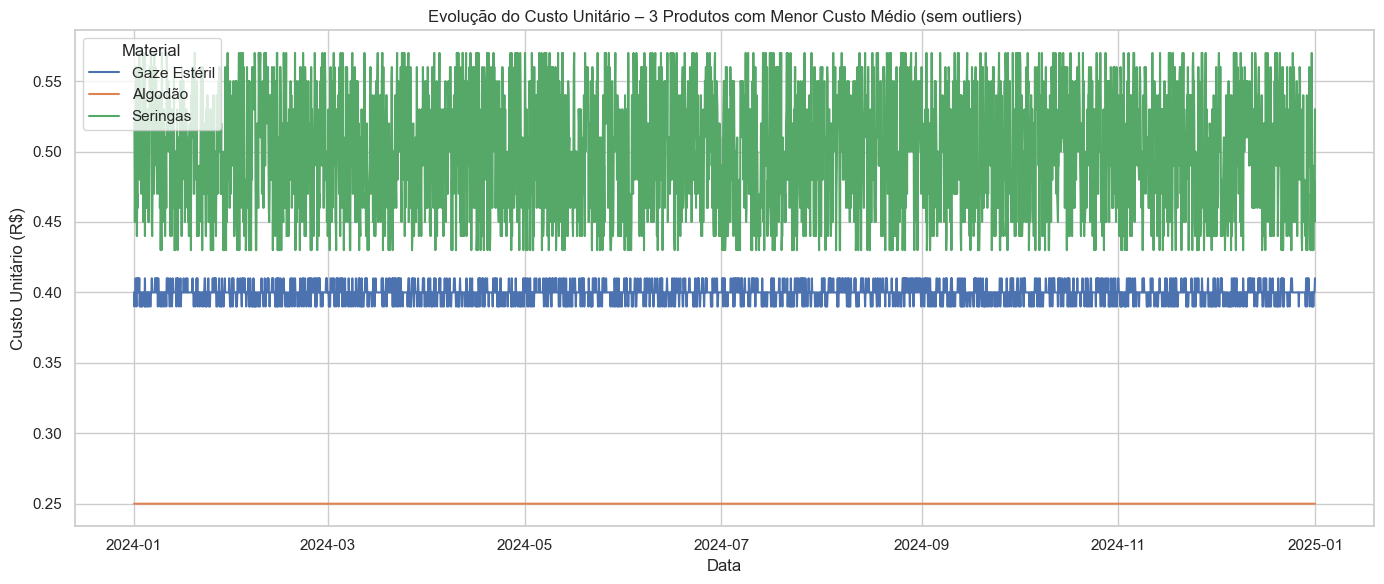

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=dados_bottom3, x='DataHora', y='Custo_Unitario', hue='Material')
plt.title('Evolução do Custo Unitário – 3 Produtos com Menor Custo Médio (sem outliers)')
plt.xlabel('Data')
plt.ylabel('Custo Unitário (R$)')
plt.tight_layout()
plt.show()


Este gráfico mostra a evolução diária do custo unitário (Custo Unitário (R$)) para três materiais identificados como tendo o "Menor Custo Médio", com a remoção de outliers (valores atípicos), de janeiro de 2024 até o início de 2025.

Eixo X (Data): Representa o tempo, do início de 2024 ao início de 2025.

Eixo Y (Custo Unitário (R$)): Representa o custo unitário do material em Reais (R$). A escala varia de aproximadamente R$0,25 a R$0,55.

Linhas (Material): Cada linha colorida representa um material específico: Gaze Estéril (azul), Algodão (laranja) e Seringas (verde).

📊 O que observar:

    Produtos no topo da tabela são os que mais flutuam de preço.

    Valores baixos indicam preços controlados ou fixos.

📌 Interpretação:

* Gaze Estéril: O custo unitário da Gaze Estéril é consistentemente em torno de R$0,37, mostrando muito pouca variação diária e uma linha notavelmente plana.
    
* Algodão: O custo unitário do Algodão é o menor entre os três, permanecendo perfeitamente estável em R$0,25 ao longo de todo o ano. Isso sugere um preço fixo ou altamente previsível para este item.

* Custos Geralmente Baixos: Todos os três materiais permanecem consistentemente abaixo de R$0,60 por unidade, confirmando sua classificação como produtos de "menor custo médio".

* Seringas: As Seringas apresentam a maior variabilidade entre os itens de baixo custo. Seu custo unitário flutua significativamente, principalmente entre R$0,40 e R$0,55. A linha é muito mais "ruidosa" em comparação com Gaze Estéril e Algodão, indicando mudanças de preço mais frequentes e perceptíveis.

Itens com alta volatilidade devem ser analisados:

* Possuem alta sazonalidade?

* São adquiridos por diferentes unidades com políticas distintas?

* Têm fornecedores instáveis?


    
    
    

### 5 produtos mais usados por mês

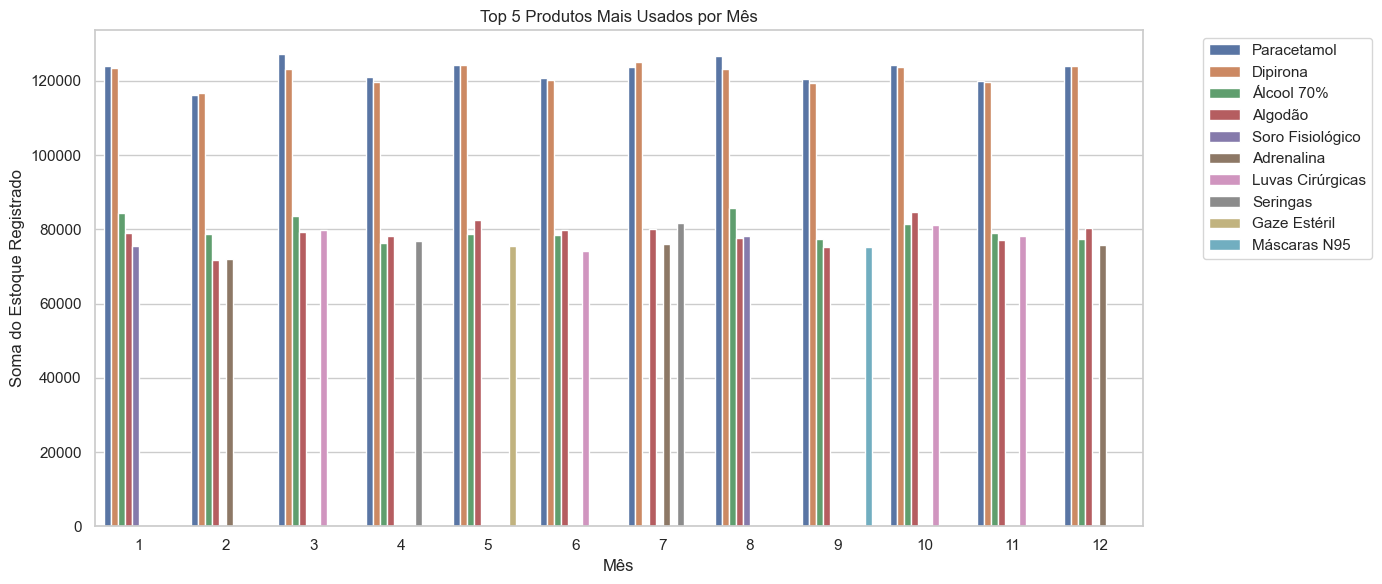

In [17]:
# Padronizar nomes de colunas
dados.columns = [col.strip().replace(" ", "_") for col in dados.columns]

# Converter DataHora
dados["DataHora"] = pd.to_datetime(dados["DataHora"])

# Filtrar dados válidos (sem valores negativos)
dados = dados[(dados["Estoque"] >= 0) & (dados["Custo_Unitario"] >= 0)]

# Criar coluna de mês
dados["Mes"] = dados["DataHora"].dt.month

# Agrupar por mês e material
grupo_mes = dados.groupby(["Mes", "Material"])["Estoque"].sum().reset_index()

# Selecionar top 5 materiais por mês
top5_por_mes = grupo_mes.sort_values(["Mes", "Estoque"], ascending=[True, False]).groupby("Mes").head(5)

# Plotar gráfico
plt.figure(figsize=(14, 6))
sns.barplot(data=top5_por_mes, x="Mes", y="Estoque", hue="Material")
plt.title("Top 5 Produtos Mais Usados por Mês")
plt.xlabel("Mês")
plt.ylabel("Soma do Estoque Registrado")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Este gráfico apresenta os cinco materiais hospitalares mais utilizados em cada mês ao longo do ano de 2024. A análise foi feita com base na soma dos estoques registrados por material em cada mês, assumindo que a quantidade estocada reflete o nível de uso e reposição do item.

Cada barra representa o total de estoque registrado para um material específico em determinado mês, permitindo observar quais insumos são mais consumidos em diferentes épocas do ano.

* Eixo X (Mês): Representa os meses do ano, de 1 (janeiro) a 12 (dezembro).

* Eixo Y (Soma do Estoque Registrado): Representa o total de estoque registrado (provavelmente indicando o uso total ou consumo) para cada material em unidades, variando de 0 a mais de 120.000.

* Barras (Material): Cada cor dentro de um grupo mensal de barras representa um 
material diferente, conforme identificado na legenda.

📌 Interpretação:

* Variações sazonais foram identificadas: alguns materiais, como Soro Fisiológico e Paracetamol, tendem a ter picos de uso em meses específicos — possivelmente devido ao aumento de doenças respiratórias ou infecções.

* Produtos como Luvas Cirúrgicas e Máscaras N95 aparecem de forma constante entre os mais usados, indicando demanda estável e contínua ao longo do ano, refletindo seu uso em procedimentos de rotina e medidas de proteção.

* Esses padrões podem ajudar no planejamento logístico, antecipando a necessidade de reabastecimento em períodos críticos.

### 5 produtos mais usados por período de 3 horas

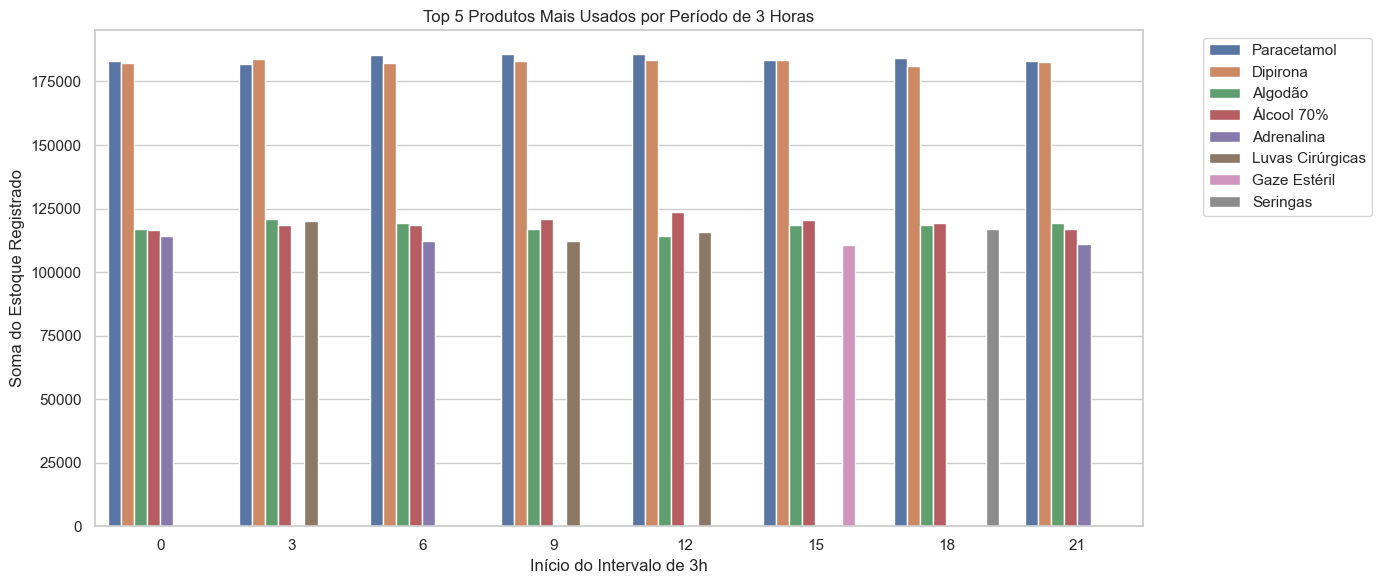

In [18]:
# Criar coluna com intervalo de 3 horas
dados["Periodo_3h"] = dados["DataHora"].dt.hour // 3 * 3

# Agrupar por faixa de 3h e material
grupo_3h = dados.groupby(["Periodo_3h", "Material"])["Estoque"].sum().reset_index()

# Selecionar top 5 por faixa de horário
top5_por_3h = grupo_3h.sort_values(["Periodo_3h", "Estoque"], ascending=[True, False]).groupby("Periodo_3h").head(5)

# Plotar gráfico
plt.figure(figsize=(14, 6))
sns.barplot(data=top5_por_3h, x="Periodo_3h", y="Estoque", hue="Material")
plt.title("Top 5 Produtos Mais Usados por Período de 3 Horas")
plt.xlabel("Início do Intervalo de 3h")
plt.ylabel("Soma do Estoque Registrado")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Este gráfico mostra os cinco materiais com maior uso para cada faixa de 3 horas ao longo do dia. As faixas são: 0h–3h, 3h–6h, ..., 21h–24h. O objetivo é identificar padrões de consumo intra-diários, ou seja, quais materiais são mais requisitados em determinados turnos.


Eixo X (Início do Intervalo de 3h): Representa a hora de início do intervalo de 3 horas (0, 3, 6, 9, 12, 15, 18, 21). Isso cobre um ciclo completo de 24 horas.

Eixo Y (Soma do Estoque Registrado): Representa o total de estoque registrado (uso/consumo) para cada material em unidades, variando de 0 a mais de 175.000.

Barras (Material): Cada cor dentro de um grupo de barras de intervalo de 3 horas representa um material diferente, conforme identificado na legenda.


📌 Interpretação:

* Observa-se que materiais como Adrenalina, Luvas Cirúrgicas e Seringas apresentam maior uso nas faixas de horário diurnas, especialmente entre 6h e 18h, que correspondem ao horário de maior volume de procedimentos.

* Produtos como Paracetamol e Dipirona têm uma presença mais distribuída ao longo do dia, indicando uso contínuo, provavelmente relacionado à administração de medicamentos em pacientes internados.

* Essa análise é útil para otimizar a distribuição de insumos por turno, garantindo que os materiais certos estejam disponíveis nos horários de maior demanda. 